In [138]:
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sb
  

In [136]:
stock_name ='AAPL'
starting_date ='2012-4-1'
ending_date = '2013-11-25'
n =5

In [137]:
windowed_df_forward = pd.read_csv(f'E:\Semesters\Fyp prepation\Dataset\AAPL_Stock_Dataset\{stock_name}_STOCK_SENTI_SCORE_{n}_FORWARD_{starting_date}_TO_{ending_date}_.csv')

In [139]:
print(windowed_df_forward.corr())

             Unnamed: 0    Target  Target+1  Target+2  Target+3  Target+4  \
Unnamed: 0     1.000000 -0.702785 -0.699410 -0.696149 -0.692776 -0.689795   
Target        -0.702785  1.000000  0.991773  0.984061  0.977540  0.970983   
Target+1      -0.699410  0.991773  1.000000  0.991746  0.984017  0.977520   
Target+2      -0.696149  0.984061  0.991746  1.000000  0.991724  0.984029   
Target+3      -0.692776  0.977540  0.984017  0.991724  1.000000  0.991724   
Target+4      -0.689795  0.970983  0.977520  0.984029  0.991724  1.000000   
Target+5      -0.685955  0.963905  0.970890  0.977428  0.983995  0.991772   
pos_sentm     -0.374047  0.263843  0.257565  0.262654  0.270074  0.280006   
neg_sentm     -0.328159  0.223962  0.218952  0.218242  0.224168  0.230373   
sentm_score   -0.340486  0.227849  0.219715  0.221402  0.229145  0.236601   

             Target+5  pos_sentm  neg_sentm  sentm_score  
Unnamed: 0  -0.685955  -0.374047  -0.328159    -0.340486  
Target       0.963905   0.263843  

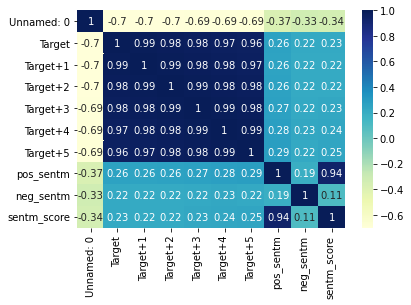

In [145]:
bdataplot_forward = sb.heatmap(windowed_df_forward.corr(), cmap="YlGnBu", annot=True)

In [143]:
windowed_df_backward = pd.read_csv(f'E:\Semesters\Fyp prepation\Dataset\AAPL_Stock_Dataset\{stock_name}_STOCK_SENTI_SCORE_{n}_BACKWARD_{starting_date}_TO_{ending_date}_.csv')

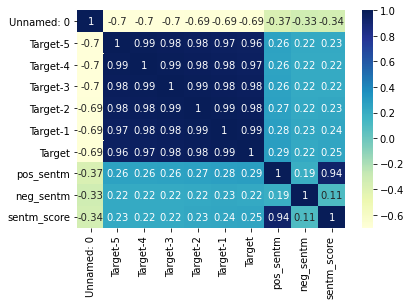

In [144]:
dataplot_backward = sb.heatmap(windowed_df_backward.corr(), cmap="YlGnBu", annot=True)

In [146]:
windowed_df_forward['5dayEWM'] = windowed_df_forward['Target'].ewm(span=5, adjust=False).mean()


In [152]:
windowed_df_forward.drop(windowed_df_forward.columns[0], axis=1, inplace = True)

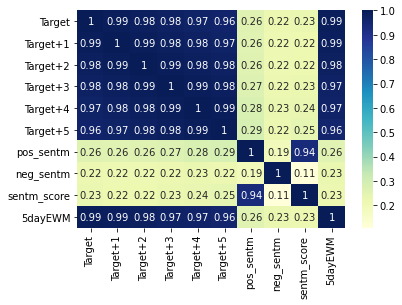

In [153]:
dataplot_forward = sb.heatmap(windowed_df_forward.corr(), cmap="YlGnBu", annot=True)

In [155]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [163]:
windowed_df_forward['Target'] =scaler.fit_transform(windowed_df_forward['Target'].values.reshape(-1,1)) 

windowed_df_forward

,Date,Target,Target+1,Target+2,Target+3,Target+4,Target+5,pos_sentm,neg_sentm,sentm_score,5dayEWM
0,2012-04-03,0.718779,22.057858,21.780714,21.412500,22.093929,22.475714,0.766375,0.233625,4,21.945715
1,2012-04-04,0.728857,21.780714,21.412500,22.093929,22.475714,22.296785,0.365000,0.635000,2,21.983096
2,2012-04-05,0.703951,21.412500,22.093929,22.475714,22.296785,22.631430,0.378000,0.622000,2,21.915635
3,2012-04-09,0.670860,22.093929,22.475714,22.296785,22.631430,22.722500,0.238400,0.761600,2,21.747924
4,2012-04-10,0.732099,22.475714,22.296785,22.631430,22.722500,22.444286,0.634667,0.365333,4,21.863259
...,...,...,...,...,...,...,...,...,...,...,...
386,2013-11-19,0.415573,18.593929,18.862858,18.749643,18.522499,18.555357,0.181800,0.218200,1,18.557670
387,2013-11-20,0.417563,18.862858,18.749643,18.522499,18.555357,18.392857,0.162667,0.504000,1,18.569756
388,2013-11-21,0.441731,18.749643,18.522499,18.555357,18.392857,18.612143,0.522889,0.477111,3,18.667457
389,2013-11-22,0.431556,18.522499,18.555357,18.392857,18.612143,18.564285,0.815750,0.184250,5,18.694852


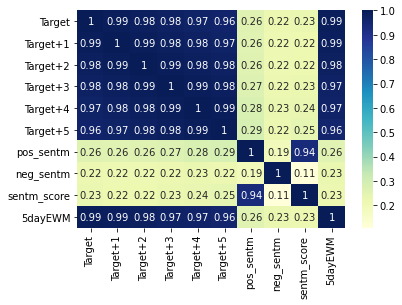

In [164]:
dataplot_forward = sb.heatmap(windowed_df_forward.corr(), cmap="YlGnBu", annot=True)

<AxesSubplot:>

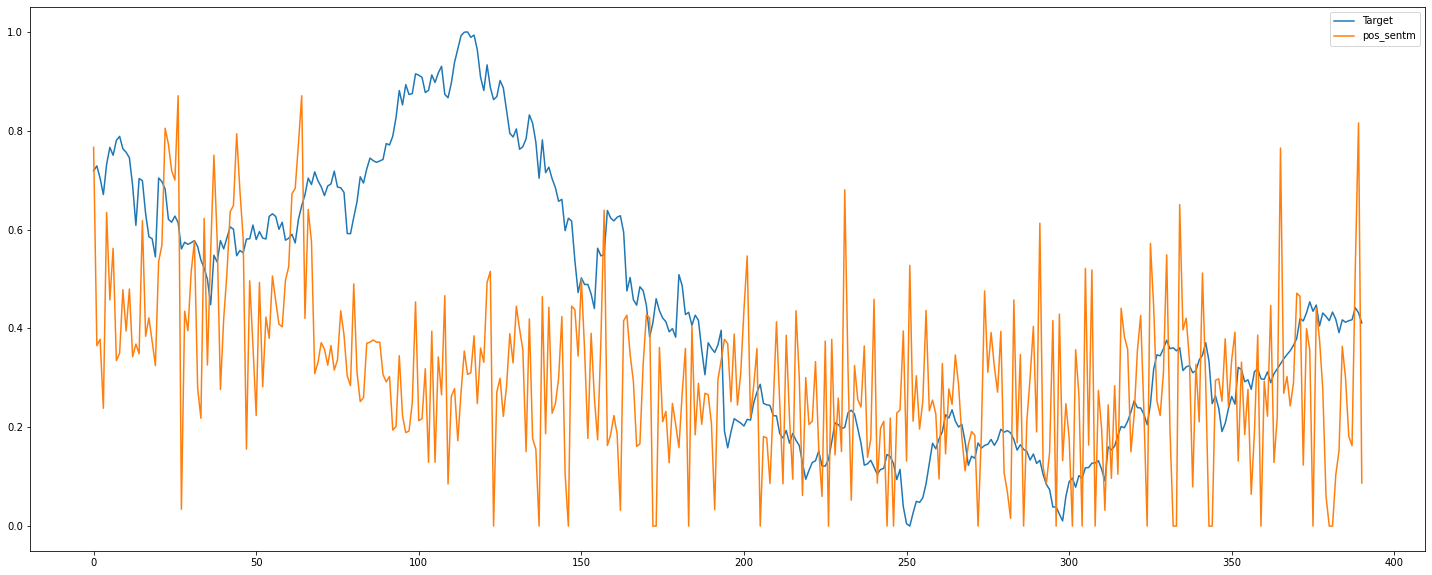

In [175]:
windowed_df_forward[['Target', 'pos_sentm']].plot(figsize=(25,10))



<AxesSubplot:>

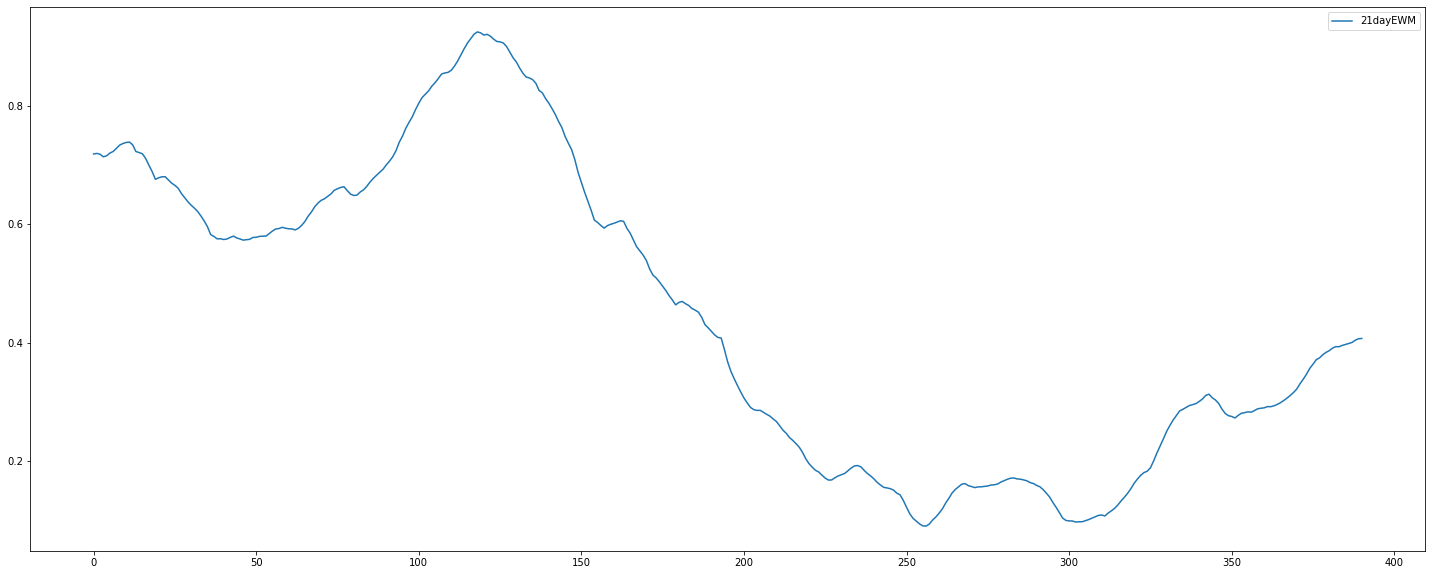

In [179]:
windowed_df_forward[['21dayEWM']].plot(figsize=(25,10))